#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

##1. Data Cleaning

### Read the dataset

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Dataset.csv')
df.sample(3)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8287,22:34:00,Saturday,31-50,Male,Junior high school,Employee,2-5yr,Public (13?45 seats),Governmental,Below 1yr,...,Going straight,Driver or rider,Male,18-30,2,NaN,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
6117,18:55:00,Thursday,Over 51,Male,High school,Owner,2-5yr,Other,Owner,Above 10yr,...,Going straight,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
5580,8:49:00,Monday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,18-30,3,Driver,Normal,Unknown or other,Changing lane to the right,Slight Injury


In [147]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# import needed libs:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Function to split certain columns to get maximum usage for said column:
def extract_numeric(value):
    if isinstance(value, str):
        numeric_str = ''.join(c for c in value if c.isdigit() or c == '.')
        try:
            return float(numeric_str)
        except ValueError:
            return None
    return value

def extract_numeric(value):
    if isinstance(value, str):
        numeric_str = ''.join(c for c in value if c.isdigit() or c == '.')
        try:
            return float(numeric_str)
        except ValueError:
            return None
    return value

### Handle Missing Values

In [148]:
# get the shape
df.shape

(12316, 32)

In [184]:
df.sample(25)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
5688,22:20:00,Sunday,18-30,Male,Above high school,Employee,Above 10yr,Automobile,Owner,Unknown,...,Going straight,Pedestrian,Female,Under 18,2,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
3084,22:20:00,Monday,18-30,Male,Elementary school,Employee,2-5yr,Automobile,Governmental,Unknown,...,Going straight,Pedestrian,Male,18-30,3,Driver,Normal,Unknown or other,Driving carelessly,Slight Injury
2460,9:48:00,Saturday,Unknown,Male,Junior high school,Employee,1-2yr,Other,Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
9996,18:45:00,Wednesday,31-50,Male,High school,Employee,Below 1yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
5714,20:15:00,Thursday,18-30,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
487,15:20:00,Sunday,31-50,Male,Junior high school,Owner,Below 1yr,Stationwagen,Owner,2-5yrs,...,Unknown,Pedestrian,Female,Over 51,1,Driver,Normal,Crossing from nearside - masked by parked or s...,Moving Backward,Slight Injury
10212,8:30:00,Sunday,Under 18,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
711,19:00:00,Tuesday,Over 51,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,2-5yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
5762,13:00:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Going straight,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
10865,20:41:00,Thursday,31-50,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,Over 51,3,Self-employed,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [151]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [152]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [153]:
df.replace('na', pd.NA, inplace=True) # Change any record with 'na' to NaN


In [154]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_severity              4443
Work_of_casuality           

In [155]:
df.duplicated().sum()
# there is no duplicated data

0

In [156]:
# deal with missing values:
# could use an imputer

df["Educational_level"].fillna(df['Educational_level'].mode()[0], inplace = True)


In [157]:
df["Vehicle_driver_relation"].fillna(df['Vehicle_driver_relation'].mode()[0], inplace = True)
df["Driving_experience"].fillna(df['Driving_experience'].mode()[0], inplace = True)
df["Type_of_vehicle"].fillna(df['Type_of_vehicle'].mode()[0], inplace = True)
df["Owner_of_vehicle"].fillna(df['Owner_of_vehicle'].mode()[0], inplace = True)
df["Service_year_of_vehicle"].fillna(df['Service_year_of_vehicle'].mode()[0], inplace = True)
df["Defect_of_vehicle"].fillna(df['Defect_of_vehicle'].mode()[0], inplace = True)
df["Area_accident_occured"].fillna(df['Area_accident_occured'].mode()[0], inplace = True)
df["Lanes_or_Medians"].fillna(df['Lanes_or_Medians'].mode()[0], inplace = True)
df["Road_allignment"].fillna(df['Road_allignment'].mode()[0], inplace = True)
df["Types_of_Junction"].fillna(df['Types_of_Junction'].mode()[0], inplace = True)
df["Road_surface_type"].fillna(df['Road_surface_type'].mode()[0], inplace = True)
df["Type_of_collision"].fillna(df['Type_of_collision'].mode()[0], inplace = True)
df["Vehicle_movement"].fillna(df['Vehicle_movement'].mode()[0], inplace = True)
df["Work_of_casuality"].fillna(df['Work_of_casuality'].mode()[0], inplace = True)
df["Road_surface_type"].fillna(df['Road_surface_type'].mode()[0], inplace = True)
df["Fitness_of_casuality"].fillna(df['Fitness_of_casuality'].mode()[0], inplace = True)


In [158]:
df.isnull().sum()
df.shape
# No column is dropped.

(12316, 32)

In [159]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle           0
Defect_of_vehicle                 0
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision                 0
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                  0
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_severity              4443
Work_of_casuality           

In [160]:
df["Casualty_class"].fillna(df['Casualty_class'].mode()[0], inplace = True)
df["Sex_of_casualty"].fillna(df['Sex_of_casualty'].mode()[0], inplace = True)
df["Age_band_of_casualty"].fillna(df['Age_band_of_casualty'].mode()[0], inplace = True)
df["Casualty_severity"].fillna(df['Casualty_severity'].mode()[0], inplace = True)


In [161]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [162]:
df.shape

(12316, 32)

### Correct any inconsistent data entries.

In [163]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [164]:
df.sample(100)


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2489,20:45:00,Thursday,Under 18,Male,Elementary school,Employee,5-10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Driver or rider,Male,18-30,3,Other,Normal,Not a Pedestrian,No distancing,Slight Injury
6127,19:56:00,Tuesday,18-30,Male,Junior high school,Employee,5-10yr,Taxi,Owner,Unknown,...,Going straight,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Turnover,Slight Injury
1239,15:05:00,Monday,Under 18,Male,High school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
4655,15:43:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,Unknown,...,Moving Backward,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
6691,16:30:00,Tuesday,Unknown,Female,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2:08:00,Saturday,31-50,Male,Junior high school,Employee,1-2yr,Automobile,Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
9693,15:50:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Public (13?45 seats),Owner,5-10yrs,...,Reversing,Driver or rider,Male,Under 18,2,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
1317,17:00:00,Tuesday,Unknown,Female,Junior high school,Employee,5-10yr,Automobile,Owner,Above 10yr,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
2443,5:17:00,Wednesday,18-30,Male,High school,Owner,2-5yr,Long lorry,Owner,2-5yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


### Ensure data types are appropriate for each column.

---



In [187]:
# changed the casualtu severty to int
df['Casualty_severity'] = df['Casualty_severity'].astype(int)

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [166]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

### Identify and analyze patterns in the data.

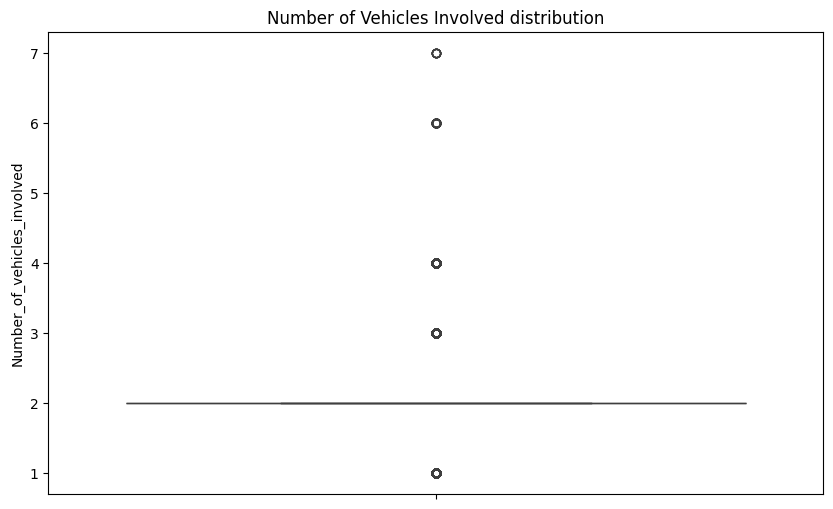

In [168]:
# Using the boxplot graph we can Identify outliers that should be dealt with
plt.figure(figsize = (10,6))
sns.boxplot(df['Number_of_vehicles_involved'])
plt.title('Number of Vehicles Involved distribution')
plt.show()

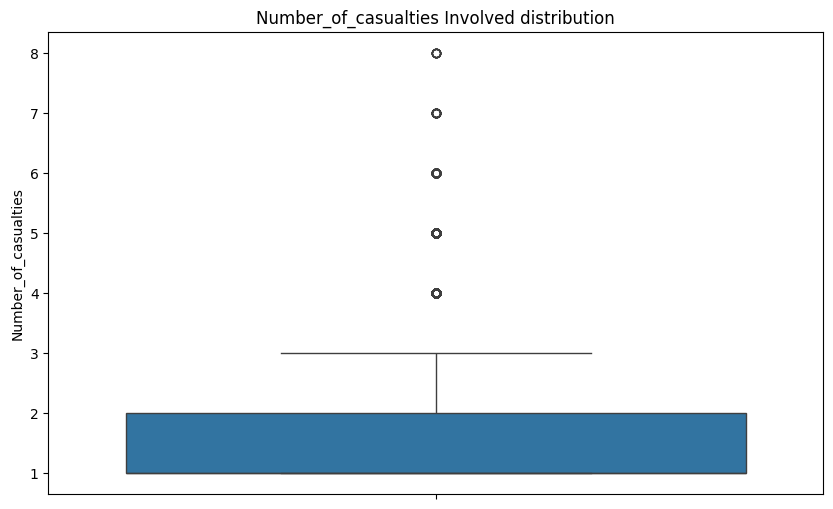

In [169]:
plt.figure(figsize = (10,6))
sns.boxplot(df['Number_of_casualties'])
plt.title('Number_of_casualties Involved distribution')
plt.show()

In [170]:
# Removing outliears:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# since taking out the outlieres for the Number of vehicles involved causes a huge cut to the recorded data, deleting it will cause issues.
df = remove_outliers(df, 'Number_of_casualties')
df.shape

(11596, 32)

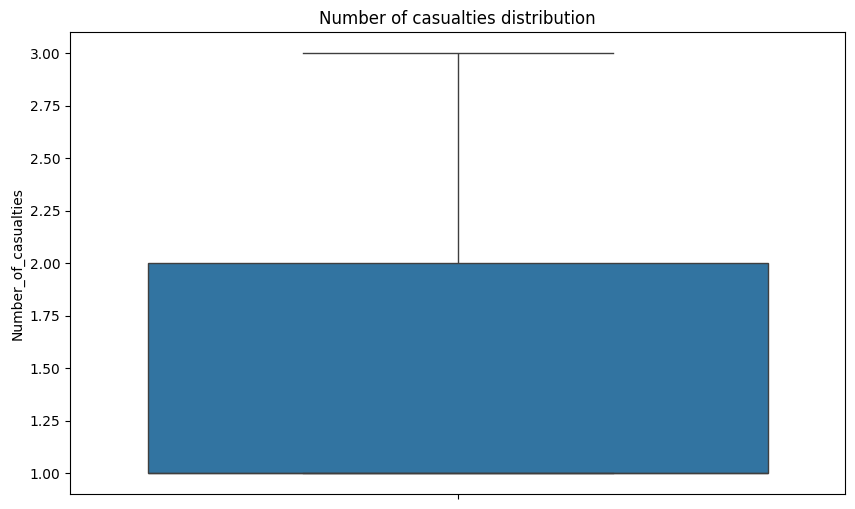

In [171]:
# check wether outlieres are succesfully removed:
plt.figure(figsize = (10,6))
sns.boxplot(df['Number_of_casualties'])
plt.title('Number of casualties distribution')
plt.show()  # SUCCESS

In [172]:
# Create a correlation matrix to identify relationshipd between numirec columns:
numeric_columns = df[['Number_of_vehicles_involved', 'Number_of_casualties']]
corr_matrix = numeric_columns.corr()
print(corr_matrix)

                             Number_of_vehicles_involved  Number_of_casualties
Number_of_vehicles_involved                     1.000000              0.167802
Number_of_casualties                            0.167802              1.000000


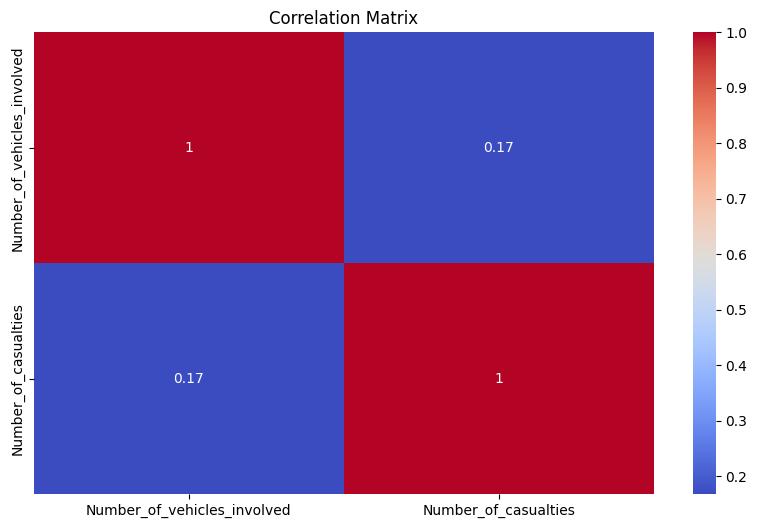

In [173]:
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

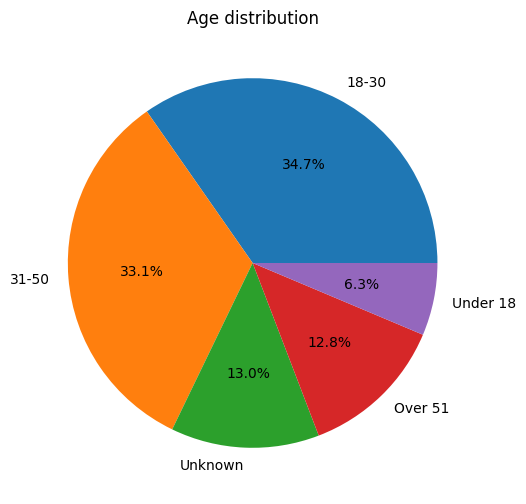

In [175]:
# the best way to Visualize the distribution of catagorical data is using the pie chart:
Age_df = df['Age_band_of_driver'].value_counts()
plt.figure(figsize = (10,6))
plt.pie(Age_df, labels = Age_df.index, autopct = '%1.1f%%')
plt.title('Age distribution')
plt.show()

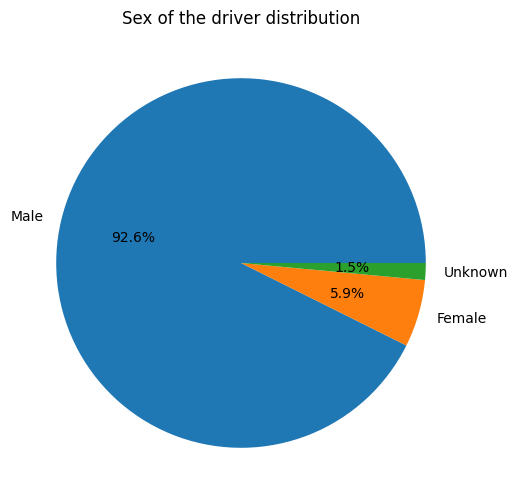

In [176]:
# the best way to Visualize the distribution of catagorical data is using the pie chart:
Age_df = df['Sex_of_driver'].value_counts()
plt.figure(figsize = (10,6))
plt.pie(Age_df, labels = Age_df.index, autopct = '%1.1f%%')
plt.title('Sex of the driver distribution')
plt.show()

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


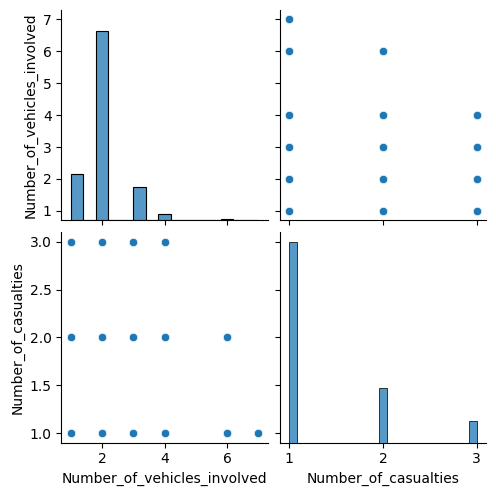

In [181]:
sns.pairplot(df)
plt.show()

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


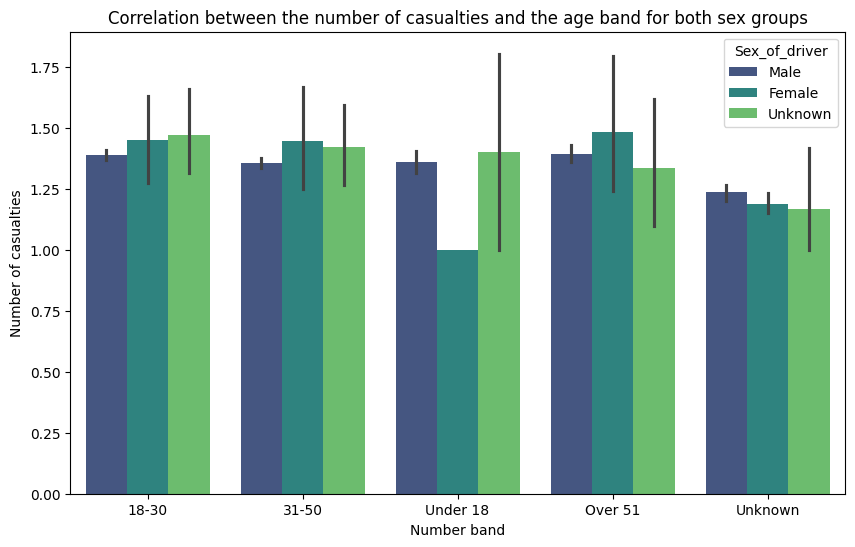

In [182]:
# using the barplot:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Age_band_of_driver', y = 'Number_of_casualties', hue = 'Sex_of_driver', palette = 'viridis')
plt.title('Correlation between the number of casualties and the age band for both sex groups')
plt.xlabel('Age band')
plt.ylabel('Number of casualties')
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

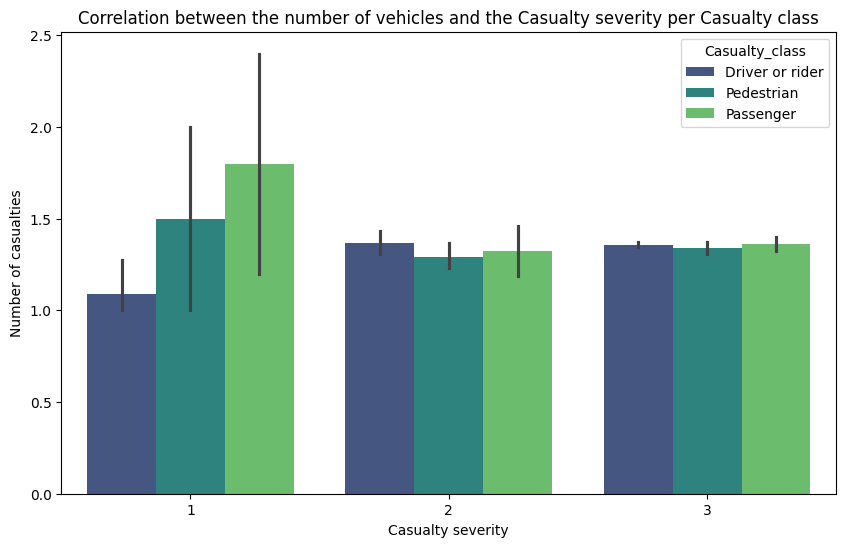

In [193]:
# using the scatterplot:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Casualty_severity', y = 'Number_of_casualties', hue = 'Casualty_class', palette = 'viridis')
plt.title('Correlation between the number of vehicles and the Casualty severity per Casualty class')
plt.xlabel('Casualty severity')
plt.ylabel('Number of casualties')
plt.show()


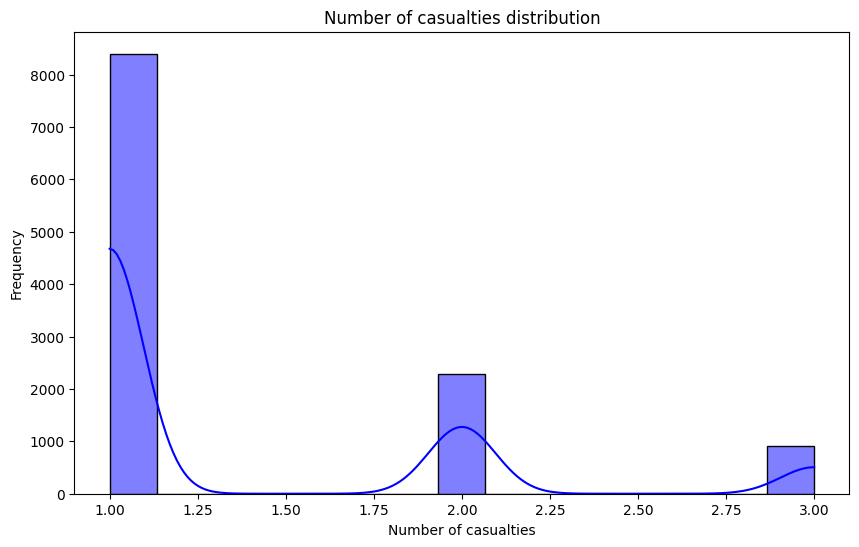

In [186]:
plt.figure(figsize = (10,6))
sns.histplot(df['Number_of_casualties'], kde = True,bins= 15 , color='blue')
plt.title('Number of casualties distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

Notice from that 18-51 are more prone to crashes.
Notice that male drivers are way more than female drivers.
Shockingly this data set no correlation between the number of vehicals involved and the number of casualties.
We also notice that the number of possible casualties in a car crash is most likely to be 1, 2 or 3.
Notice also that passengers fall casuelties to crashes more than drivers.